# 🐧 Semi-supervised Learning

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

### Loading the Dataset

In [2]:
# Load penguins.csv
df = pd.read_csv('penguins.csv')
df = df.drop(['studyName', 'Sample Number', 'Date Egg', 'Comments', 'Island', 'Stage', 'Individual ID', 'Clutch Completion', 'Sex', 'Region'], axis=1)
df = df.dropna()
df

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
1,Adelie Penguin (Pygoscelis adeliae),39.5,17.4,186.0,3800.0,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),40.3,18.0,195.0,3250.0,8.36821,-25.33302
4,Adelie Penguin (Pygoscelis adeliae),36.7,19.3,193.0,3450.0,8.76651,-25.32426
5,Adelie Penguin (Pygoscelis adeliae),39.3,20.6,190.0,3650.0,8.66496,-25.29805
6,Adelie Penguin (Pygoscelis adeliae),38.9,17.8,181.0,3625.0,9.18718,-25.21799
...,...,...,...,...,...,...,...
338,Gentoo penguin (Pygoscelis papua),47.2,13.7,214.0,4925.0,7.99184,-26.20538
340,Gentoo penguin (Pygoscelis papua),46.8,14.3,215.0,4850.0,8.41151,-26.13832
341,Gentoo penguin (Pygoscelis papua),50.4,15.7,222.0,5750.0,8.30166,-26.04117
342,Gentoo penguin (Pygoscelis papua),45.2,14.8,212.0,5200.0,8.24246,-26.11969


### Split the Dataset

In [3]:
# Recall that Scikit learn requires x and y to be separate:
x_data = df.drop(columns=['Species']).to_numpy()
y_data = df['Species'].to_numpy()

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform target strings
y_data = label_encoder.fit_transform(y_data)

# split into train and validation set
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

### Randomly Mask 90% of the Data

In [5]:
# Choose 90% indices at random
np.random.seed(0)
rand_indices = np.random.choice(np.arange(len(y_train)), size=int(0.90 * len(y_train)), replace=False)
# Mask y at those indices by setting it to -1
y_masked = np.copy(y_train)
y_masked[rand_indices] = -1

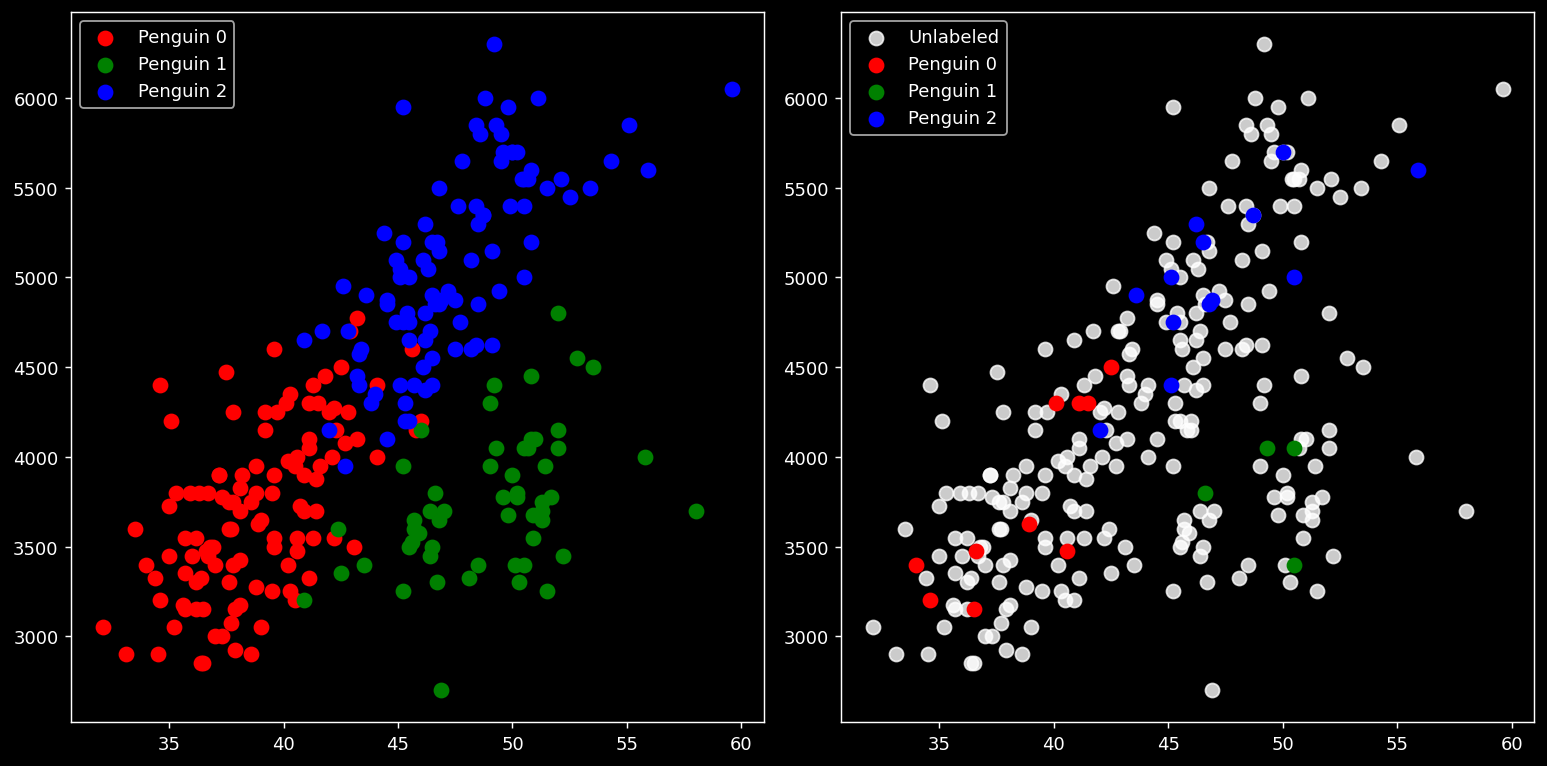

In [8]:
# Plotting
plt.style.use('dark_background')
fig, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=130)

# Plot for x_train, y_train on the left
axs[0].scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 3], color='r', s=60, label='Penguin 0')
axs[0].scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 3], color='g', s=60, label='Penguin 1')
axs[0].scatter(x_train[y_train == 2, 0], x_train[y_train == 2, 3], color='b', s=60, label='Penguin 2')
axs[0].legend()


# Plot for x_train, y_masked on the right
axs[1].scatter(x_train[y_masked == -1, 0], x_train[y_masked == -1, 3], color='w', s=60, label='Unlabeled', alpha = 0.8)
axs[1].scatter(x_train[y_masked == 0, 0], x_train[y_masked == 0, 3], color='r', s=60, label='Penguin 0')
axs[1].scatter(x_train[y_masked == 1, 0], x_train[y_masked == 1, 3], color='g', s=60, label='Penguin 1')
axs[1].scatter(x_train[y_masked == 2, 0], x_train[y_masked == 2, 3], color='b', s=60, label='Penguin 2')
axs[1].legend()


plt.tight_layout()
plt.show()

### Training with Supervised Learning

In [9]:
# initiate
clf = GaussianNB()
# fit
clf.fit(x_train[y_masked!=-1], y_masked[y_masked!=-1])
# evaluate
round(clf.score(x_val, y_val), 3)

0.924

### Training with Semisupervised Learning

In [10]:
# initiate
sm_clf = SelfTrainingClassifier(
    base_estimator=GaussianNB(), 
    threshold=0.9,                  # if > 90% sure then add it to the training set
    verbose=True
)
# fit
sm_clf.fit(x_train, y_masked)
# evaluate
round(sm_clf.score(x_val, y_val), 3)

End of iteration 1, added 230 new labels.
End of iteration 2, added 5 new labels.
End of iteration 3, added 1 new labels.


0.955